# Lab 4: The Pi-Mu-e Experiment

Kollin Schultz, Justin Houle

# Abstract
For this Pion Muon Positron lab we ran two separate experiments. For these experiments we were expected to measure and calculate the mass of a Pion and a Muon as well as the lifetime of a Muon. To calculate the mass of the particles we analyzed pictures of the visible routes of Pions Muons and Positrons in a hydrogen bubble chamber. The bubble chamber was invented by Donald A. Glaser in the mid 50's. It is a chamber that is filled with superheated transparent liquid (usually liquid hydrogen). Glaser earned the Nobel Prize in Physics in 1960 for this invention. Using the bubble chamber photographs and measurements, we inputed out measurments in jupyter notebook to achieve a Pion mass of 146.6 MeV/c<sup>2</sup> and a Muon mass of 109.9 MeV/c<sup>2</sup>. Both of our values were within a 5% error of the accepted values. While we were measuring the length and curvature of the particle paths another experiment ran a scintillator. This device kept track of the number of muons that entered and measured the decay rate of those muons. This devices works in such a way that incoming particles strick a luminescent material which absorbs the impact energy.  


# Introduction
In our Pi-Mu-e experiment we analyzed bubble tracks that were created by high energy particles. First a pion particle would enter the hydrogen bubble chamber with an initial momentum. As the original pion particle slows and eventually comes to a stop it decays into a muon (and non charged neutrons) which splits into a different path. Eventually the muon itself with decay in a positron which is sent off into different, spiraled path. By measuring these different paths and calculating momentums and energies we can find the mass of the original Pion and Muon particles. 
Pions and muons have an extremely short lifetime, and we used a scintillator to measure these lifetimes over a few trials that last 8 hours at a time. The device measured over a million interactions but only a small fraction of those interactions were viable for our experiement to determine the lifetime of a muon. 


# Methods

###### Determination of Pion and Muon Masses
For the determination of the masses of pion and muon particles, photos from a previously completed hydrogen chamber experiment were provided. From the photos the length of each visible path traveled by a muon, and the radius of every visible positron path was measured with a ruler. The measurement data from all four groups in the lab was used for mathematical analysis to determine the mass of a muon and a pion. Mathematical model used is shown in detail in the Results and Analysis section.

###### Muon Lifetime Determination
To determine the average lifetime of a muon, a scintillator was used. The scintillator was set to measure the number of muons that enter the device, and how long before they decay. The sensor was set up and allowed to run for eight hours. Data collected was analyzed to determine the average lifespan of a muon which is described in detail in the analysis section.

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('lab_equipment.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
imgplot = plt.imshow(img)
plt.show()

print("Lab Equipment used (1)")

# Results and Analysis

#### Pion and Muon Mass Determination
Measurements from all of the provided liquid hydrogen chamber pictures were averaged to account for differences in angles. The average length of the muon path was calculated as 1.3 cm, and the average rdius of the positron path was calculated to be 13.9 cm. These values were used to determine the mass of a muon. With our average positron radius value (R), the muon mass was calculated to be 109.9 eV/c<sup>2</sup>. With an accepted value of 106 eV/c<sup>2</sup>, our calculation had a 3.75% error. Our value of 109.9 eV/c<sup>2</sup> was used to calculate the mass of a pion. From our muon mass calculation and average muon path length value (L), we calculated the pion mass to be 146.6 eV/c<sup>2</sup>. The accepted value for pion mass is 140 eV/c<sup>2</sup>, so our calculation had a percent error of 4.7%. 

In [2]:
#Imported software and the raw data we collected from a csv file to use for the analysis. 
import numpy as np
from astropy.io import ascii
data=ascii.read('data.csv')

#Defined the constants needed for our calculations.
B=8800
c=1
e=3*10**-4 
rho=0.07

#Used numpy to calculate the average values from our collected data.
R=(np.mean(data['radius'])/0.785) 
L=(np.mean(data['length']/0.785))

#Defined functions given in the lab manual to calculate the masses of a pion and muon respectively.
m=(3*e*R*B)/(c) 
T=(2.1*m*(c**2)*rho*L)**(1/2) 
p=np.sqrt((T**2)+(2*T*m*(c**2)))/c
mp=(np.sqrt(((p*c)**2)+((m*(c**2))**2))+(p*c)) 
print(m)
print(mp)

109.971974522
146.62602013


#### Muon Lifetime Determination
Data from a muon detector was plotted 

(39.999999249373474, 8334.5063286236327)


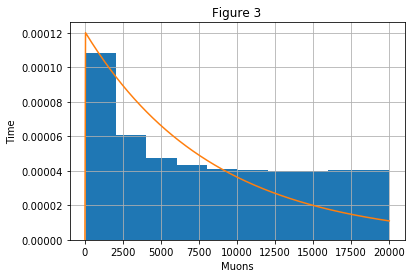

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
from scipy import stats

data2=ascii.read('exp_data.csv')
x=data2['delta_t']
P = ss.expon.fit(x)

rx = np.linspace(0,20000, 500)
rP = ss.expon.pdf(rx, *P)

print(P)
plt.grid()
plt.hist(x, normed=True)
plt.plot(rx, rP)
plt.title('Figure 3')
plt.ylabel('Time')
plt.xlabel('Muons')
plt.show()


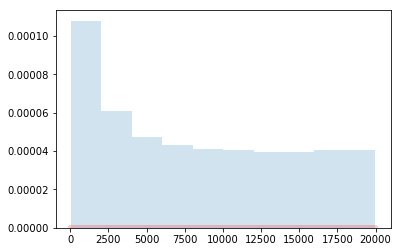

In [40]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
from scipy.stats import expon

data2=ascii.read('exp_data.csv')
x=data2['delta_t']


pdf_fitted=expon.pdf(x, loc=0, scale=1)
plt.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.2, label='expon pdf')
plt.hist(x, normed=True, histtype='stepfilled', alpha=0.2)
plt.show()

# Conclusion

Our analysis accurately determined the muon mass to be 109.9 eV/c<sup>2</sup>, which is only a 3.75% error from the accepted value. This value, however, does not account for any uncertainty. Since our data set came from multiple lab teams/reports we are unable to calculate exact values for an uncertainty. By using the same data as every other lab group, we were able to collaborate with others to determine the accuracy of our calculation. 

# Acknowledgements

